# Bank Marketing Dataset

# 1. Problem Definition

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y), based on certain features included in the dataset.

Specifically:

**Input:**
* age (numerical)
* job (categorical)
* marital (categorical)
* education (categorical)
* default (categorical)
* balance (numerical)
* housing (categorical)
* loan (categorical)
* contact (categorical)
* day (numerical)
* month (categorical)
* duration (numerical)
* campaign (numerical)
* pdays (numerical)
* previous (numerical)
* poutcome (categorical)

**Output/Target:** - has the client subscribed a term deposit?
* Yes
* No

# 2. Data Acquisition

In [1]:
# Essential libraries that will be used throughout this project

# System utilities
import os

# Kaggle resources
import kagglehub

# Data handling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train/Test Splitting
from sklearn.model_selection import train_test_split

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For class imbalance
from imblearn.over_sampling import SMOTE

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Importing the latest version of the dataset from Kaggle, and printing out the directory
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")
print('Path to dataset files', path)
print(os.listdir(path))

# Loading the dataset into pandas
df = pd.read_csv(os.path.join(path, 'bank.csv'))
display(df)

Path to dataset files C:\Users\HP\.cache\kagglehub\datasets\janiobachmann\bank-marketing-dataset\versions\1
['bank.csv']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# 3. Data Cleaning & Preprocessing

In [3]:
# Check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Remarks**: There are no missing values in this dataframe with all variables having 11162 values.

In [4]:
# Descriptive summary statistics for numerical values
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
# Since there are categorical features in this dataset, Label Encoding is required
df_encoded = df.copy()
label_encoders = {}

for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# To view the encoded mappings
col = 'job' # To type in varaible of interest
mapping = dict(enumerate(label_encoders[col].classes_))
mapping

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed',
 11: 'unknown'}

In [6]:
# Feature/Target Split
X = df_encoded.drop(columns=['deposit'])
y = df_encoded['deposit']

print(y.value_counts())

deposit
0    5873
1    5289
Name: count, dtype: int64


# 4. Exploratory Data Analysis

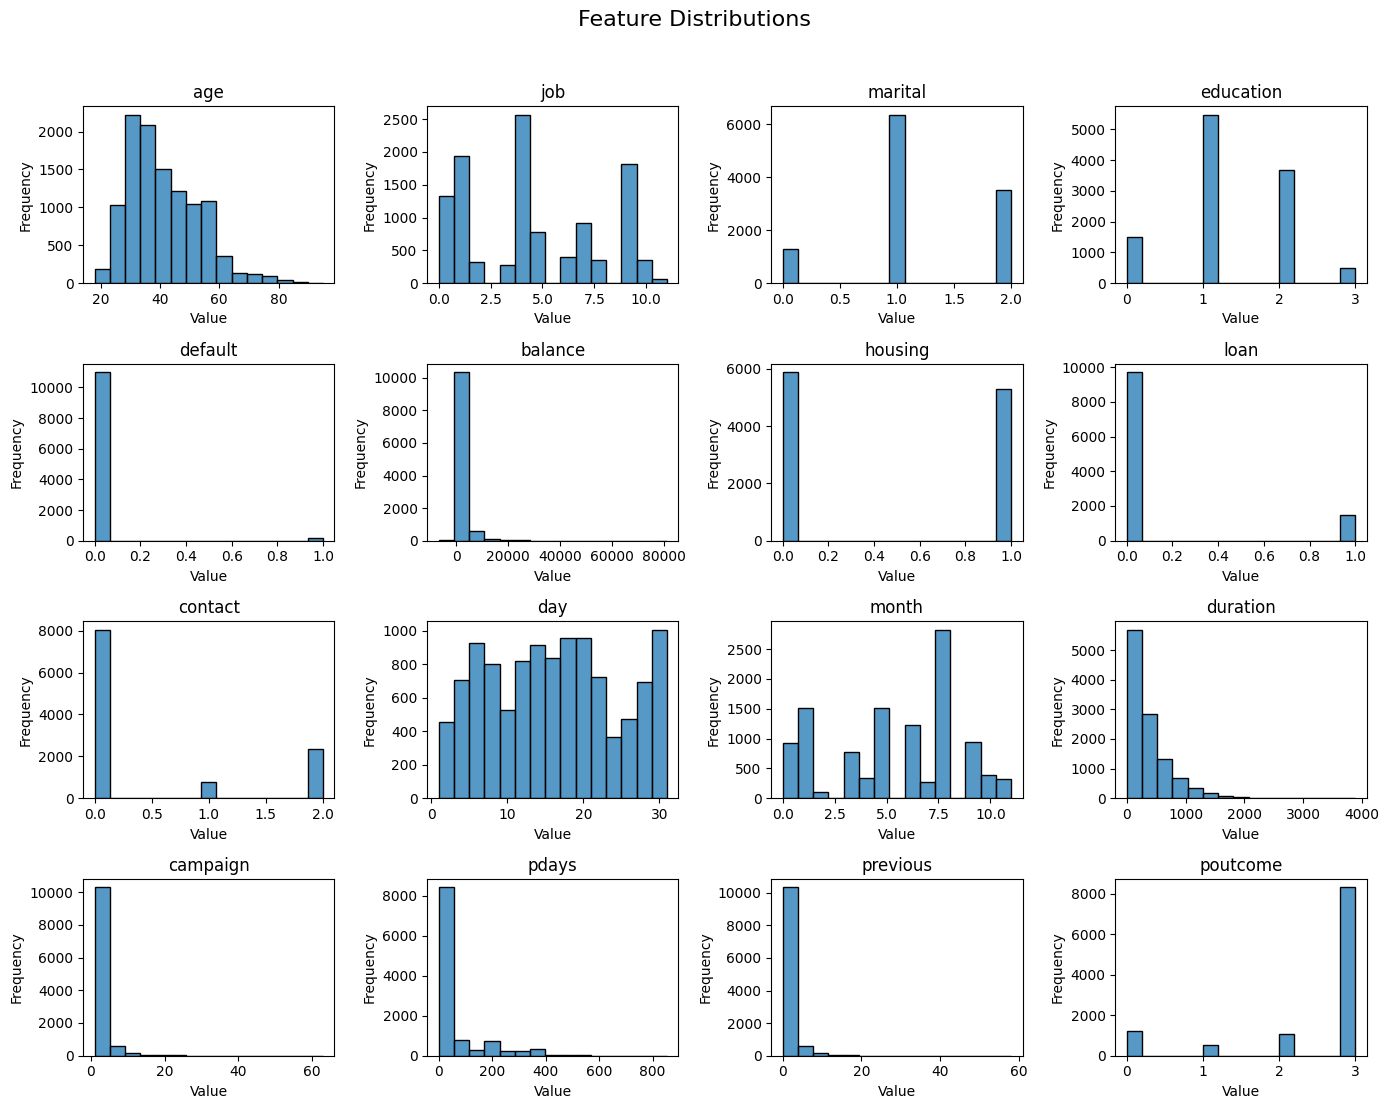

In [7]:
# Univariate Feature Distribution Histogram Plot
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14,12))
fig.suptitle('Feature Distributions', fontsize=16, y=0.92)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature histogram
for i, col in enumerate(X.columns):
    sns.histplot(X[col], bins=15, edgecolor='black', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to make room for suptitle
plt.show()

**Remarks:**
* Exponential-like Distribution: *age*, *balance*, *duration*, *campaign*, *pdays*, *previous*
* Uniform Distribution: *day*
* Discrete: *job*, *marital*, *education*, *default*, *housing*, *loan*, *contact*, *month*, *poutcome*

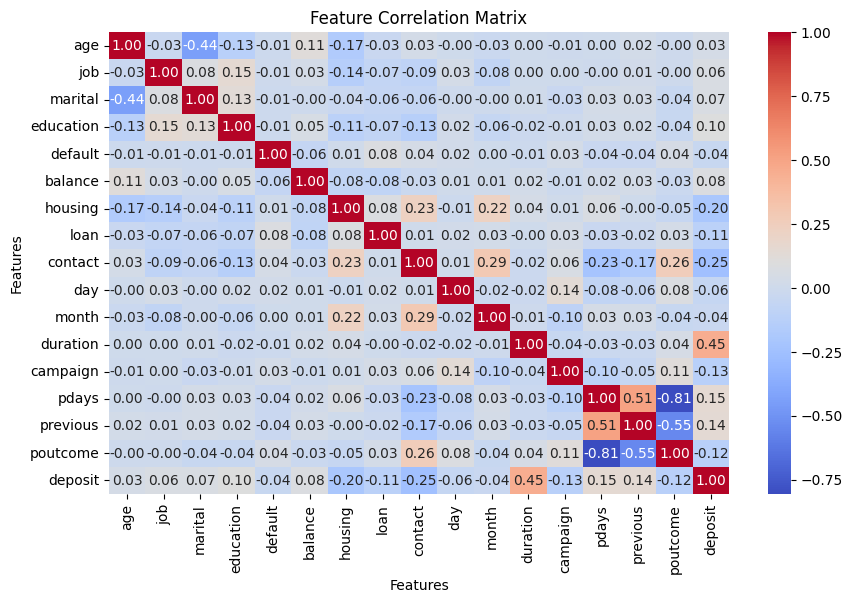

In [8]:
# Correlation matrix to visually represent the relationship between features
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

**Remarks:** Most features show weak correlation with the target variable *(deposit)*, with the exception of *duration*, which has a moderately strong correlation coefficient of 0.45.

In [9]:
# Multivariate Scatter Plot
#sns.set(style='ticks')
#sns.pairplot(df_encoded, hue='deposit')

**Remarks:** The scatter plot matrix does not reveal any strong or clear multivariate relationships between the features and the outcome variable.

# 5. Train-Test Split

In [10]:
# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split sizes and class balance
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

print('\nTraining target distribution:')
print(y_train.value_counts())

print('\nTesting target distribution:')
print(y_test.value_counts())

Training set size: 8929
Testing set size: 2233

Training target distribution:
deposit
0    4707
1    4222
Name: count, dtype: int64

Testing target distribution:
deposit
0    1166
1    1067
Name: count, dtype: int64


**Remarks:** Both the training and testing datasets were fairly evenly distributed between the "no" and "yes" outcomes.

# 6. Model Training

In [11]:
# Train a Random Forest model with the training dataset
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)

# Train a Logistic Regression model with the training dataset
lr_model = LogisticRegression(max_iter=1000,random_state=42)
lr_model.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [12]:
# Apply the trained Random Forest model on the testing dataset
rf_y_pred = rf_model.predict(X_test)

# Apply the trained Logistic Regression model on the testing dataset
lr_y_pred = lr_model.predict(X_test)

# 7a. Model Evaluation (Random Forest)

Model Test Accuracy: 0.8334079713390058

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



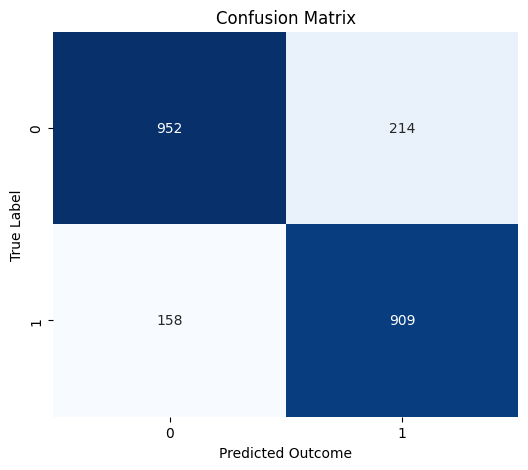

In [13]:
# Accuracy Score
print('Model Test Accuracy:', accuracy_score(y_test, rf_y_pred))

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Outcome')
plt.ylabel('True Label')
plt.show()

**Remarks:** The Random Forest Classifier achieved an accuracy of 83.3%, indicating strong overall performance. Additionally, it demonstrated high precision, recall, and F1-score values, reflecting effective classification across both classes and a balanced trade-off between false positives and false negatives.

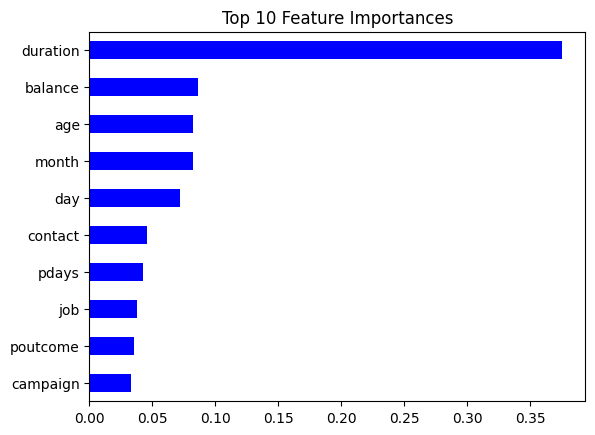

In [14]:
# Feature Importance derived from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10).sort_values(ascending=True)

top_features.plot(kind='barh', color='blue')
plt.title("Top 10 Feature Importances")
plt.show()

# 7b. Model Evaluation (Logistic Regression)

Model Test Accuracy: 0.7787729511867443

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1166
           1       0.77      0.76      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



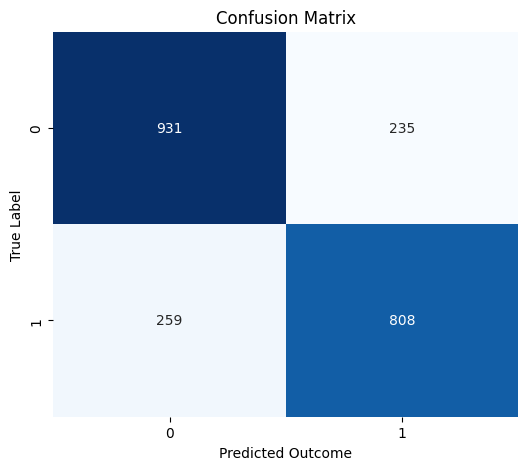

In [15]:
# Accuracy Score
print('Model Test Accuracy:', accuracy_score(y_test, lr_y_pred))

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, lr_y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, lr_y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Outcome')
plt.ylabel('True Label')
plt.show()

**Remarks:** Although Logistic Regression achieved a respectable accuracy of 77.9%, it falls short compared to the higher accuracy obtained by the Random Forest model. This suggests that the Random Forest Classifier is better suited for this particular classification task.

# 8. Conclusion

In this study, both Logistic Regression and Random Forest models were applied to predict whether a client will subscribe to a term deposit based on 16 input features. While Logistic Regression provided a solid baseline with reasonable predictive performance, the Random Forest classifier outperformed it across all key evaluation metrics, including accuracy, precision, recall, and F1-score.

The feature importance plot from the Random Forest model clearly indicates that *duration* is by far the most influential predictor of the target variable, contributing significantly more than any other feature. Its importance score exceeds 0.35, while all other features have importance scores below 0.10.

This suggests that the length of the last contact with the client is highly predictive of whether they will subscribe to a term deposit. However, it’s important to note that *duration* is not available at prediction time (since it refers to the outcome of the contact), which may introduce data leakage if included during model deployment.

Additionally during the exploratory data analysis (EDA), the *duration* variable exhibited the highest positive correlation with the target variable, indicating it is the strongest individual predictor of whether a client subscribes to a term deposit. This aligns with expectations since longer call durations often reflect greater client engagement and interest.